In [9]:
#############################################################################
#
# Make HoldBite Movies
# 08/20/19
#
#############################################################################
import numpy as np
import os, sys
from datetime import datetime as dt
import importlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import json
import random
import re
from PIL import Image, ImageFont, ImageDraw
import cv2
import dlib
import argparse
import imutils
import time
from imutils.video import VideoStream
import statistics
from pathlib import Path
import time
from scipy.stats import t
import holdbite_utils as hbu
import cv_utils as cvu

In [10]:
#############################################################################
#
# Define data folders
#
#############################################################################
codeFolder = Path().absolute()
dDrive = os.path.dirname(codeFolder)
academyDataFolder = 'academy_data'
holdBiteDataFolder = 'HoldBiteData_M23_M24_M25_M26'
analysisFolder = 'Analysis'
movieInfoFolder = 'MovieInfo'

academyDataPath = os.path.join(dDrive, academyDataFolder, holdBiteDataFolder)
analysisPath = os.path.join(academyDataPath, analysisFolder)
movInfoPath = os.path.join(analysisPath, movieInfoFolder)

In [11]:
#############################################################################
#
# Get List of Movie Info files
#
#############################################################################
movInfoFiles = os.listdir(movInfoPath)
movInfoJsons = cvu.subStringInList(movInfoFiles, '.json')
delidx = np.where(np.char.find(movInfoJsons, 'M26')>0)
delidx = delidx[0].astype(int)
movInfoJsons = np.delete(movInfoJsons, delidx)
movInfoJsons

array(['MovieInfo_M23_HoldBite_1571203911.json',
       'MovieInfo_M23_HoldBite_1571205553.json',
       'MovieInfo_M23_HoldBite_1571206833.json',
       'MovieInfo_M23_HoldBite_1571208085.json',
       'MovieInfo_M23_HoldBite_1571209413.json',
       'MovieInfo_M23_HoldBite_1571291468.json',
       'MovieInfo_M23_HoldBite_1571292785.json',
       'MovieInfo_M23_HoldBite_1571293787.json',
       'MovieInfo_M23_HoldBite_1571383479.json',
       'MovieInfo_M23_HoldBite_1571384644.json',
       'MovieInfo_M23_HoldBite_1571440952.json',
       'MovieInfo_M23_HoldBite_1571443066.json',
       'MovieInfo_M23_HoldBite_1571449705.json',
       'MovieInfo_M23_HoldBite_1571554888.json',
       'MovieInfo_M23_HoldBite_1571558458.json',
       'MovieInfo_M23_HoldBite_1571559146.json',
       'MovieInfo_M23_HoldBite_1571560679.json',
       'MovieInfo_M23_HoldBite_1571571084.json',
       'MovieInfo_M23_HoldBite_1571609526.json',
       'MovieInfo_M23_HoldBite_1571611435.json',
       'MovieInfo_M2

In [14]:
importlib.reload(sys.modules['holdbite_utils'])
importlib.reload(sys.modules['cv_utils'])

<module 'cv_utils' from 'D:\\python_code\\cv_utils.py'>

M23_HoldBite_1571203911
M23_HoldBite_1571205553
M23_HoldBite_1571206833
M23_HoldBite_1571208085
M23_HoldBite_1571209413
M23_HoldBite_1571291468
M23_HoldBite_1571292785
M23_HoldBite_1571293787
M23_HoldBite_1571383479
M23_HoldBite_1571384644
M23_HoldBite_1571440952
M23_HoldBite_1571443066
M23_HoldBite_1571449705
M23_HoldBite_1571554888
M23_HoldBite_1571558458
M23_HoldBite_1571559146
M23_HoldBite_1571560679
M23_HoldBite_1571571084
M23_HoldBite_1571609526
M23_HoldBite_1571611435
M23_HoldBite_1571611890
M23_HoldBite_1571621796
M23_HoldBite_1571622856
M23_HoldBite_1571623993
M23_HoldBite_1571624373
M23_HoldBite_1571624636
M23_HoldBite_1571702642
M23_HoldBite_1571703176
M23_HoldBite_1571703900
M23_HoldBite_1571705664
M23_HoldBite_1571706181
M23_HoldBite_1571707069
M23_HoldBite_1571715310
M23_HoldBite_1571724926
M23_HoldBite_1571881117
D:\DeepLabCut\projects\HoldBiteSideM232425-Sarah-2019-11-18\videos\M23_HoldBite_1571881117_SideVideoDeepCut_resnet50_HoldBiteSideM232425Nov18shuffle1_52000.csv


(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
[INFO] cleaning up...
M24_HoldBite_1572056606
D:\DeepLabCut\projects\HoldBiteSideM232425-Sarah-2019-11-18\videos\M24_HoldBite_1572056606_SideVideoDeepCut_resnet50_HoldBiteSideM232425Nov18shuffle1_52000.csv
D:\DeepLabCut\projects\HoldBiteFrontM232425-Sarah-2019-11-18\videos\M24_HoldBite_1572056606_FrontVideoDeepCut_resnet50_Hol

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

Save to: D:\academy_videos\HoldBiteMovies_AnalogTrace_M23_M24_M25_M26\M25_HoldBite_1571942948.avi
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
[INFO] cleaning up...
M25_HoldBite

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
[INFO] cleaning up...
M25_HoldBite_1571947700
D:\DeepLabCut\projects\HoldBiteSideM232425-Sarah-2019-11-18\videos\M25_HoldBite_1571947700_SideVideoDeepCut_resnet50_HoldBiteSideM232425Nov18shuffle1_52000.csv
D:\DeepLabCut\projects\HoldBiteFrontM232425-Sarah-2019-11-18\videos\M25_HoldBite_1571947700_FrontVideoDeepCut_resnet50_HoldBiteFrontM232425Nov18shuffle1_35300.csv
Save to: D:\academy_videos\HoldBiteMovies_AnalogTrace_M23_M24_M25_M26\M25_HoldBite_1571947700.avi
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

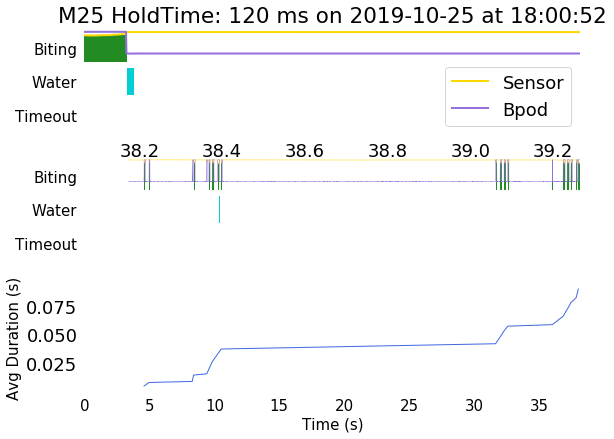

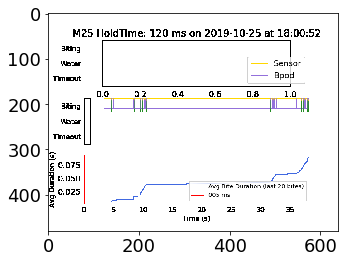

In [15]:
saveToFolder = os.path.join(dDrive, 'academy_videos', 'HoldBiteMovies_AnalogTrace_M23_M24_M25_M26')
sideLabelFolder = os.path.join(dDrive, 'DeepLabCut', 'projects', 'HoldBiteSideM232425-Sarah-2019-11-18', 'videos')
frontLabelFolder = os.path.join(dDrive, 'DeepLabCut', 'projects', 'HoldBiteFrontM232425-Sarah-2019-11-18', 'videos')

movieInfoFolder = os.path.join(dDrive, 'academy_data', 'HoldBiteData_M23_M24_M25_M26', 'Analysis', 'MovieInfo')
for fname in movInfoJsons:
    movinfoname, jext = os.path.splitext(fname)
    sessStr = movinfoname[10:]
    print(sessStr)
    jf = os.path.join(movieInfoFolder, fname)
    sideLabelFile = os.path.join(sideLabelFolder, sessStr + '_SideVideoDeepCut_resnet50_HoldBiteSideM232425Nov18shuffle1_52000.csv')
    frontLabelFile = os.path.join(frontLabelFolder, sessStr + '_FrontVideoDeepCut_resnet50_HoldBiteFrontM232425Nov18shuffle1_35300.csv')

    hasSideLabels = os.path.isfile(sideLabelFile)
    hasFrontLabels = os.path.isfile(frontLabelFile)
    hasLabels = hasSideLabels or hasFrontLabels
    if hasLabels:
        print(sideLabelFile)
        print(frontLabelFile)
        if not os.path.isfile(os.path.join(saveToFolder, sessStr + '.avi')):
            try:
                movInfo = hbu.loadData(jf)
            
            except:
                print('failed to load:', fname)
            
            if hasSideLabels:
                try:
                
                    sLabels = cvu.loadLabels(sideLabelFile)
                except Exception as e:
                    print('failed to load:', sideLabelFile)
                    print('Error:', e)
                    sLabels = None
            if hasFrontLabels:
                try:
                    fLabels = cvu.loadLabels(frontLabelFile)
                except Exception as e:
                    print('failed to load:', frontLabelFile)
                    print('Error:', e)
                    fLabels = None
            try:
                hbu.makeHoldBiteMovieLabeled(movInfo, fLabels, sLabels, saveToFolder)
            except Exception as e:
                print('fail:', fname)
                print('Error:', e)
#    else:
#        if not os.path.isfile(os.path.join(saveToFolder, sessStr + '.avi')):
#            try:
#                movInfo = hbu.loadData(jf)
#            
#            except:
#                print('failed to load:', fname)
#        try:
#            hasFront = len(movInfo['FrontMovie']['Folder'])>0
#            hasSide = len(movInfo['SideMovie']['Folder'])>0
#            if hasFront or hasSide:
#                hbu.makeHoldBiteMovie(movInfo, saveToFolder)
#        except Exception as e:
#            print('fail:', fname)
#            print('Error:', e)
        
#print(movInfo['AllBiteTimes'])


In [12]:
for midx, movInfoJson in enumerate(movInfoJsons):
    
    movInfo = hbu.loadData(os.path.join(movInfoPath, movInfoJson))
    sessionPath, sessionFile = os.path.split(movInfo['SessionFile'])
    sessionName, jext = os.path.splitext(sessionFile)
    print(sessionName)
    
    hasFront = len(movInfo['FrontMovie']['Folder'])>0
    hasSide = len(movInfo['SideMovie']['Folder'])>0
    
    if hasFront:
        #try:
        #    frontWindow = tuple(movInfo['FrontMovie']['Window'])
        #except:
        #    frontWindow = (180, 100, 500, 340)
        #    updateMovieInfoFile(os.path.join(movInfoPath, movInfoJson), 'FrontMovie', frontWindow, key2='Window')
        
        fcamFolder, movTimeStr = os.path.split(movInfo['FrontMovie']['Folder'])
        saveToFPath = os.path.join(fcamFolder, sessionName+'_FrontVideo.avi')
        if not os.path.isfile(saveToFPath):
            
            fImPaths = [os.path.join(fcamFolder, movTimeStr, imName) for imName in movInfo['FrontMovie']['ImageNames']]
            cvu.makeSingleVideo(fImPaths, movInfo['FrontMovie']['Timestamps'], saveToFPath, window=None, rotate=True, codec='MJPG',ext='.avi')

    if hasSide:
        #try:
        #    sideWindow = tuple(movInfo['SideMovie']['Window'])
        #except:
        #    sideWindow = (260, 110, 580, 350)
        #    updateMovieInfoFile(os.path.join(movInfoPath, movInfoJson), 'SideMovie', sideWindow, key2='Window')

        scamFolder, movTimeStr = os.path.split(movInfo['SideMovie']['Folder'])
        saveToSPath = os.path.join(scamFolder, sessionName+'_SideVideo.avi')
        if not os.path.isfile(saveToSPath):
            sImPaths = [os.path.join(scamFolder, movTimeStr, imName) for imName in movInfo['SideMovie']['ImageNames']]
            #window for vids up to 1559552818
            #makeSingleVideo(sImPaths, movInfo['SideMovie']['Timestamps'], saveToSPath, window=(100, 160, 420, 400), rotate=True, codec='MJPG',ext='.avi')
            cvu.makeSingleVideo(sImPaths, movInfo['SideMovie']['Timestamps'], saveToSPath, window=None, rotate=True, codec='MJPG',ext='.avi')

#makeHoldBiteMovie(movInfo, saveToFolder)

M23_HoldBite_1571203911
M23_HoldBite_1571205553
M23_HoldBite_1571206833
M23_HoldBite_1571208085
M23_HoldBite_1571209413
M23_HoldBite_1571291468
M23_HoldBite_1571292785
M23_HoldBite_1571293787
M23_HoldBite_1571383479
M23_HoldBite_1571384644
M23_HoldBite_1571440952
M23_HoldBite_1571443066
M23_HoldBite_1571449705
M23_HoldBite_1571554888
M23_HoldBite_1571558458
M23_HoldBite_1571559146
M23_HoldBite_1571560679
M23_HoldBite_1571571084
M23_HoldBite_1571609526
hf: 120
wf: 160
FrameRate: 30
Writer size: 160 120
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size: (120, 160)
Frame size

KeyboardInterrupt: 

[INFO] cleaning up...


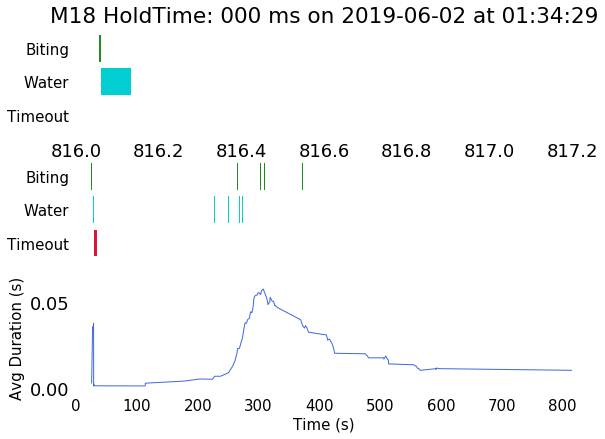

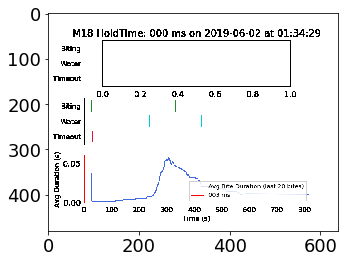

In [42]:




saveToFolder = os.path.join(dDrive, 'academy_videos', 'HoldBiteMovies_AnalogTrace')
sideLabelFolder = os.path.join(dDrive, 'DeepLabCut', 'projects', 'HoldBiteSide-Sarah-2019-08-30', 'videos')
frontLabelFolder = os.path.join(dDrive, 'DeepLabCut', 'projects', 'HoldBiteFront-Sarah-2019-08-28', 'videos')
movieInfoFolder = os.path.join(dDrive, 'academy_data', 'HoldBiteData_M23_M24_M25_M26', 'Analysis', 'MovieInfo')
fname = 'MovieInfo_M18_HoldBite_1559464469.json'
sessStr, jext = os.path.splitext(fname[10:])
jf = os.path.join(movieInfoFolder, fname)
sideLabelFile = os.path.join(sideLabelFolder, sessStr + '_SideVideoDeepCut_resnet50_HoldBiteSideAug30shuffle1_19000.csv')
frontLabelFile = os.path.join(frontLabelFolder, sessStr + '_FrontVideoDeepCut_resnet50_HoldBiteFrontAug28shuffle1_296930.csv')

movInfo = hbu.loadData(jf)
sLabels = cvu.loadLabels(sideLabelFile)
fLabels = cvu.loadLabels(frontLabelFile)

hbu.makeHoldBiteMovieLabeled(movInfo, fLabels, sLabels, saveToFolder)


In [37]:
jf = os.path.join(dDrive, 'academy_data', 'HoldBiteData_M18_M19_M20_M22', 'Analysis', 'MovieInfo', 'MovieInfo_M18_HoldBite_1559464469.json')
updateMovieInfoFile(jf, 'FrontMovie', (180, 100, 500, 340), key2='Window')
updateMovieInfoFile(jf, 'SideMovie', (120, 150, 440, 390), key2='Window')
movInfo = hbu.loadData(jf)

In [34]:
movInfoJsons

array(['MovieInfo_M23_HoldBite_1571203911.json',
       'MovieInfo_M23_HoldBite_1571205553.json',
       'MovieInfo_M23_HoldBite_1571206833.json',
       'MovieInfo_M23_HoldBite_1571208085.json',
       'MovieInfo_M23_HoldBite_1571209413.json',
       'MovieInfo_M23_HoldBite_1571291468.json',
       'MovieInfo_M23_HoldBite_1571292785.json',
       'MovieInfo_M23_HoldBite_1571293787.json',
       'MovieInfo_M23_HoldBite_1571383479.json',
       'MovieInfo_M23_HoldBite_1571384644.json',
       'MovieInfo_M23_HoldBite_1571440952.json',
       'MovieInfo_M23_HoldBite_1571443066.json',
       'MovieInfo_M23_HoldBite_1571449705.json',
       'MovieInfo_M23_HoldBite_1571554888.json',
       'MovieInfo_M23_HoldBite_1571558458.json',
       'MovieInfo_M23_HoldBite_1571559146.json',
       'MovieInfo_M23_HoldBite_1571560679.json',
       'MovieInfo_M23_HoldBite_1571571084.json',
       'MovieInfo_M23_HoldBite_1571609526.json',
       'MovieInfo_M23_HoldBite_1571611435.json',
       'MovieInfo_M2

In [12]:

movInfo = loadData(os.path.join(movInfoPath, movInfoJsons[32]))
fcamFolder, movTimeStr = os.path.split(movInfo['FrontMovie']['Folder'])
fImPaths = [os.path.join(fcamFolder, movTimeStr, imName) for imName in movInfo['FrontMovie']['ImageNames']]
sessionPath, sessionFile = os.path.split(movInfo['SessionFile'])
sessionName, jext = os.path.splitext(sessionFile)
saveToPath = os.path.join(fcamFolder, sessionName+'_FrontVideo.avi')
makeSingleVideo(fImPaths, movInfo['FrontMovie']['Timestamps'], saveToPath, window=(180, 110, 500, 350), rotate=True, codec='MJPG',ext='.avi')


#makeHoldBiteMovie(movInfo, saveToFolder)

hf: 240
wf: 320
FrameRate: 30
[INFO] cleaning up...


In [15]:
scamFolder, movTimeStr = os.path.split(movInfo['SideMovie']['Folder'])
sImPaths = [os.path.join(scamFolder, movTimeStr, imName) for imName in movInfo['SideMovie']['ImageNames']]
saveToSPath = os.path.join(scamFolder, sessionName+'_SideVideo.avi')
makeSingleVideo(sImPaths, movInfo['SideMovie']['Timestamps'], saveToSPath, window=(300, 120, 620, 360), rotate=True, codec='MJPG',ext='.avi')


hf: 240
wf: 320
FrameRate: 30
[INFO] cleaning up...


In [61]:
makeSingleVideo(fImPaths, movInfo['FrontMovie']['Timestamps'], saveToPath, window=(180, 110, 500, 350), rotate=True, codec='MJPG',ext='.avi')


FrameRate: 29


KeyboardInterrupt: 

In [16]:

makeSingleVideo(frontImPaths, frameTimes, saveToPath, window=(180, 110, 500, 350), rotate=True, codec='MJPG',ext='.avi')
makeSingleVideo(sideImPaths, frameTimes, saveToPath, window=(300, 120, 620, 360), rotate=True, codec='MJPG',ext='.avi')


1.0

In [334]:
cv2.destroyAllWindows()